### Multiple Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [156]:
df=pd.read_csv("economic_index.csv")
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [157]:
df.drop(['year','month'],inplace=True,axis=1)

In [158]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

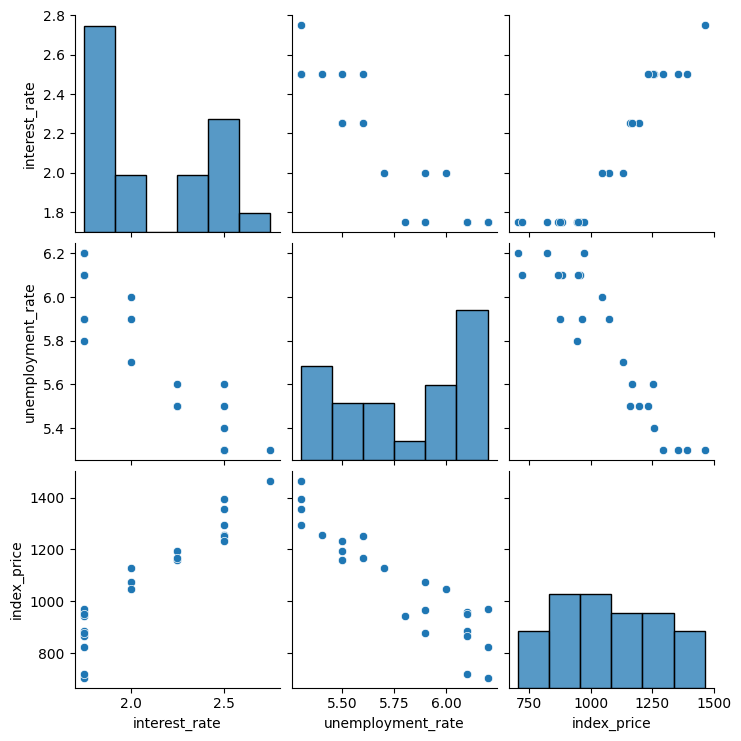

In [159]:
## Lets do visualisation
sns.pairplot(df)

In [160]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [161]:
## Seperate independent and dependent features
x=df[['interest_rate','unemployment_rate']] ## x=df.iloc[:,:-1] ## Except last column all in x
y=df.iloc[:,-1] 

In [162]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [163]:
x_train.shape

(18, 2)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

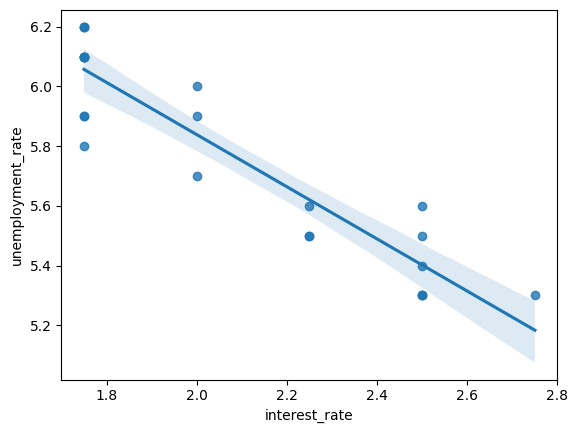

In [164]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

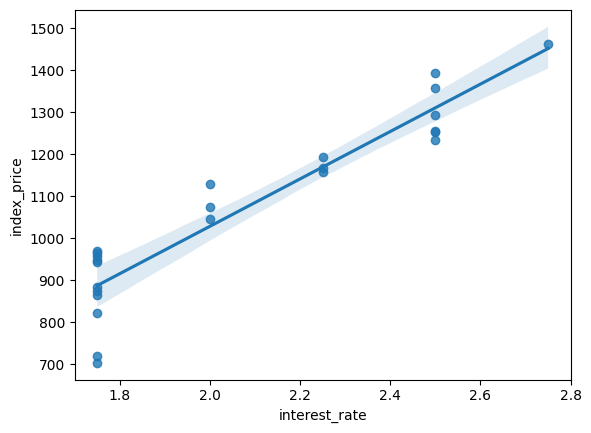

In [165]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

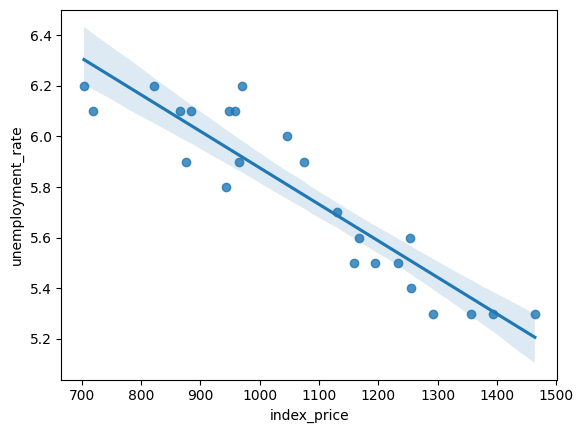

In [166]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [168]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [169]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [170]:
np.mean(validation_score)

np.float64(-8522.335956389743)

In [171]:
y_pred=regression.predict(x_test)

In [172]:
from sklearn.metrics import r2_score
print("Train R²:", r2_score(y_train, regression.predict(x_train)))
print("Test R² :", r2_score(y_test, y_pred))


Train R²: 0.8905782839461285
Test R² : 0.9105094386031009


In [178]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()

In [179]:
model.summary()

d:\anaconda3\envs\covid_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2906
Date:                Sun, 08 Jun 2025   Prob (F-statistic):                       0.752
Time:                        17:49:07   Log-Likelihood:                         -151.01
No. Observations:                  18   AIC:                                      306.0
Df Residuals:                      16   BIC:                                      307.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           135.3197    679.853      0.199      0.845   -1305.905    1576.545
x2           -71.3499    679.853     -0.105      0.918   -1512.575    1369.875
==============================================================================
Omnibus:                        0.721   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.462
Skew:                          -0.370   Prob(JB):                        0.794
Kurtosis:                       2.739   Cond. No.                         4.91
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
regression.coef_

array([135.31967713, -71.34989147])